# CFG Final Project
## Our question is: 

### What have the environmental impacts been on the SpaceX rocket launches, and how could SpaceX minimise their impact moving forward?
- How do SpaceX Rocket launches compare over time? e.g. fuel emissions, fuel types. 
- What is the Space X “space debris” impact? 
- Bonus question: compare space x launches with other countries/locations
- Bonus Machine learning Qs: Predict the amount of space debris is X amount of years. 


Loading Data:

Do we need a SQL Database? I don't think we do... This is a 2 sheet excel spreadsheet so would overcomplicate our queries. 

In [1]:
import pandas as pd 

In [2]:
#Please ensure that the "Launch and ...." sheet is in the same folder as the .pynb file, which it should be if you pulled from Git.

all_launch_df = pd.read_excel("Launch and re-entry database added company.xlsx", sheet_name="2019 launches")

In [3]:
all_launch_df.head(1)

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corpora...,4 x Hypergolic,...,41100.0,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0


In [4]:
reentries_df = pd.read_excel("Launch and re-entry database added company.xlsx", sheet_name="2019 re-entries")

In [5]:
reentries_df.head(1)

,Controlled?,Time (UTC),Day,Month,Year,Latitude,Longitude,Rocket,Company,Name,Type,Part,Booster separation altitude (km),Booster mass (km),First stage mass (km),Second stage mass (km),Total Mass (km),NOx from re-entry (km)
0,N,1.516667,1.0,1.0,2019.0,7.823,54.164,CZ-2D,China Aerospace Science and Technology Corpora...,CZ-2D,Rocket body,NaN,NaN,NaN,NaN,NaN,5500.0,5500.0


## Loading SpaceX API 

I started off by importing the "requests" library and reading the data as a JSON format. You have to use pretty print to see the data nicely in an easy-to-read way. 

In [6]:
import requests
from pprint import pprint as pp

endpoint = 'https://api.spacexdata.com/v3/launches'

response = requests.get(endpoint)
data = response.json()
pp(data)

[{'crew': None,
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'flight_number': 1,
  'is_tentative': False,
  'launch_date_local': '2006-03-25T10:30:00+12:00',
  'launch_date_unix': 1143239400,
  'launch_date_utc': '2006-03-24T22:30:00.000Z',
  'launch_failure_details': {'altitude': None,
                             'reason': 'merlin engine failure',
                             'time': 33},
  'launch_site': {'site_id': 'kwajalein_atoll',
                  'site_name': 'Kwajalein Atoll',
                  'site_name_long': 'Kwajalein Atoll Omelek Island'},
  'launch_success': False,
  'launch_window': 0,
  'launch_year': '2006',
  'links': {'article_link': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
            'flickr_images': [],
            'mission_patch': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png',
            'mission_patch_small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png',
            'presskit': None,
     

                                                             'regime': 'low-earth',
                                                             'semi_major_axis_km': 6797.192},
                                            'payload_id': 'Crew-1',
                                            'payload_mass_kg': None,
                                            'payload_mass_lbs': None,
                                            'payload_type': 'Crew Dragon',
                                            'reused': False}]}},
  'ships': ['OCISLY'],
  'static_fire_date_unix': None,
  'static_fire_date_utc': None,
  'tbd': False,
  'telemetry': {'flight_club': None},
  'tentative_max_precision': 'hour',
  'timeline': None,
  'upcoming': False},
 {'crew': None,
  'details': 'SpaceX will launch Sentinel-6 Michael Freilich into low Earth '
             'orbit for NASA, NOAA, ESA, and the European Organization for the '
             'Exploitation of Meteorological Satellites aboard a Falcon 9 from 

Then I imported "pandas" library and attempted to create a dataframe using the JSON file. I think the API was too big and missed out lots of data.  

In [7]:
import pandas as pd
df = pd.read_json("https://api.spacexdata.com/v3/launches")
df

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,static_fire_date_unix,timeline,crew,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,1.142554e+09,{'webcast_liftoff': 54},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 60},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trailblazer,[],False,2008,1217734440,2008-08-03T03:34:00.000Z,2008-08-03T15:34:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 14},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,1.221869e+09,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,Crew-1,[EE86F74],False,2020,1605486420,2020-11-16T00:27:00.000Z,2020-11-15T19:27:00-05:00,False,hour,...,NaN,None,[],2020-11-13T21:31:19.000Z,None,None,2020-11-16T00:27:00.000Z,90e9da15-25f7-11eb-badd-0e3a392f3e47,2020-11-13T21:31:19.000Z,wiki
107,108,Sentinel-6 Michael Freilich,[],False,2020,1605979020,2020-11-21T17:17:00.000Z,2020-11-21T09:17:00-08:00,False,hour,...,1.605619e+09,None,None,2020-11-17T19:27:21.000Z,2020-11-21T17:17:00.000Z,2020-11-05T23:48:07.000Z,2020-11-21T17:17:00.000Z,e93220d1-290a-11eb-bd82-0e4885cc0cd7,2020-11-17T19:27:21.000Z,wiki
108,109,Starlink-15 (v1.0),[],False,2020,1603553460,2020-10-24T15:31:00.000Z,2020-10-24T11:31:00-04:00,False,hour,...,1.605976e+09,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,110,CRS-21,[EE86F74],True,2020,1607271420,2020-12-06T16:17:00.000Z,2020-12-06T11:17:00-05:00,False,hour,...,NaN,None,None,2020-12-05T13:04:54.000Z,None,None,2020-12-06T16:17:00.000Z,774e7809-36fa-11eb-a5dc-0e33339b29dd,2020-12-05T13:04:54.000Z,wiki


## Using this website - https://github.com/shawnmavunga/Space_X_Launches_Data_Analysis

Requesting the rocket launch data from the SpaceX API as before, but using the past rocket launch data. Also checking the content of the response as before, but not using pretty print. 

In [8]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
print(response.content) 

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

## json_normalise() 
After some research, I found this function. It is a method from the pandas library that converts nested JSON data objects into DataFrames - each nested level in the JSON object is turned into a new column/Series in the DF. 

In [9]:
json1 = response.json()
data = pd.json_normalize(json1)
data # pandas DF object

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/NONM-xsKMSs,NONM-xsKMSs,None,None,NaN
183,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,None,None,None,None,NaN
184,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/ZlQHF_yBkMQ,ZlQHF_yBkMQ,None,None,NaN
185,None,NaN,False,NaN,5e9d0d95eda69973a809d1ec,True,[],None,[],[],...,None,https://www.reddit.com/r/spacex/comments/k2ts1...,[],[],None,https://youtu.be/VVu2bSJJhgI,VVu2bSJJhgI,None,None,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        187 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     187 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   187 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       187 non-null    object 
 9   ships                      187 non-null    object 
 10  capsules                   187 non-null    object 
 11  payloads                   187 non-null    object 
 12  launchpad                  187 non-null    object 
 13  flight_number              187 non-null    int64  

In [11]:
data.columns
len(data.columns)

43

In [12]:
data.shape

(187, 43)

In [13]:
pp(json1)

[{'auto_update': True,
  'capsules': [],
  'cores': [{'core': '5e9e289df35918033d3b2623',
             'flight': 1,
             'gridfins': False,
             'landing_attempt': False,
             'landing_success': None,
             'landing_type': None,
             'landpad': None,
             'legs': False,
             'reused': False}],
  'crew': [],
  'date_local': '2006-03-25T10:30:00+12:00',
  'date_precision': 'hour',
  'date_unix': 1143239400,
  'date_utc': '2006-03-24T22:30:00.000Z',
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'failures': [{'altitude': None,
                'reason': 'merlin engine failure',
                'time': 33}],
  'fairings': {'recovered': False,
               'recovery_attempt': False,
               'reused': False,
               'ships': []},
  'flight_number': 1,
  'id': '5eb87cd9ffd86e000604b32a',
  'launch_library_id': None,
  'launchpad': '5e9e4502f5090995de566f86',
  'links': {'article': 'https://www.space.com/

  'date_local': '2020-12-06T11:17:00-05:00',
  'date_precision': 'hour',
  'date_unix': 1607271420,
  'date_utc': '2020-12-06T16:17:00.000Z',
  'details': "SpaceX's 21st ISS resupply mission on behalf of NASA and the "
             'first under the CRS-2 contract, this mission brings essential '
             'supplies to the International Space Station using the cargo '
             "variant of SpaceX's Dragon 2 spacecraft. The external payload "
             'for this mission is the Nanoracks Bishop Airlock. Falcon 9 and '
             'Dragon launch from LC-39A, Kennedy Space Center and the booster '
             'is expected to land on an ASDS. The mission will be complete '
             'with return and recovery of the Dragon capsule and down cargo.',
  'failures': [],
  'fairings': None,
  'flight_number': 110,
  'id': '5eb87d4effd86e000604b391',
  'launch_library_id': None,
  'launchpad': '5e9e4502f509094188566f88',
  'links': {'article': 'https://spaceflightnow.com/2020/12/06/sp

However, when doing this alot of the data is IDs and not the names that we need which makes it hard to read and hard to analyse. For example, the rocket column has no info about the rocket, just the ID number. 

The next set of code uses the API again to get information about the launches using the IDs for each space launch. 

## Definitions:
'payload' - a payload in terms of a rocket launch is any cargo/equipment that is carried by a rocket and intended to be deployed in space or delivered to a specific destination. It is typically placed on top of the rocket and separated from the rocket's stages once it reaches its destination. The rocket is designed to carry the payload into space. 
'launchpad' - The facility where the rocket is launched from
'cores' - a core in terms of a rocket launch refers to the central structure of a rocket's main engine - it can be multiple cores. It can be reusable for future launches, and in this case the core includes not only the main engine, but also additional equipment such as landing legs, guidance systems, and parachutes. The ability to recover and reuse rocket cores can significantly reduce the cost of spaceflight, as it eliminates the need to build a new rocket for each launch. SpaceX's Falcon 9 rocket, for example, uses reusable first-stage cores that can be landed and recovered for future launches.

In [14]:
#subset of our dataframe keeping only the features we want and the flight number
data = data[['rocket', 'success', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']].copy()

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
# data = data[data['cores'].map(len)==1]
# data = data[data['payloads'].map(len)==1]

# # Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
# data['cores'] = data['cores'].map(lambda x : x[0])
# data['payloads'] = data['payloads'].map(lambda x : x[0])

# Convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date
data = data[['rocket', 'success', 'payloads', 'launchpad', 'cores', 'flight_number', 'date']]

In [15]:
data.info()
type(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rocket         187 non-null    object
 1   success        186 non-null    object
 2   payloads       187 non-null    object
 3   launchpad      187 non-null    object
 4   cores          187 non-null    object
 5   flight_number  187 non-null    int64 
 6   date           187 non-null    object
dtypes: int64(1), object(6)
memory usage: 10.4+ KB


pandas.core.frame.DataFrame

In [16]:
data['rocket'].unique()

array(['5e9d0d95eda69955f709d1eb', '5e9d0d95eda69973a809d1ec',
       '5e9d0d95eda69974db09d1ed'], dtype=object)

In [17]:
data['launchpad'].unique()

array(['5e9e4502f5090995de566f86', '5e9e4501f509094ba4566f84',
       '5e9e4502f509092b78566f87', '5e9e4502f509094188566f88'],
      dtype=object)

In [18]:
data['payloads'].head(5)

0                           [5eb0e4b5b6c3bb0006eeb1e1]
1                           [5eb0e4b6b6c3bb0006eeb1e2]
2    [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...
3                           [5eb0e4b7b6c3bb0006eeb1e5]
4                           [5eb0e4b7b6c3bb0006eeb1e6]
Name: payloads, dtype: object

In [19]:
type(data['payloads'])

pandas.core.series.Series

In [20]:
second_row = data.loc[2, 'payloads']
print(second_row)
type(second_row)

['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb0006eeb1e4']


list

In [21]:
pd.set_option('display.max_colwidth', None)
data['cores'].head(1)

0    [{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]
Name: cores, dtype: object

In [22]:
#data[['cores'][0]]

In [23]:
result = data[pd.isna(data['success'])]
result

,rocket,success,payloads,launchpad,cores,flight_number,date
171,5e9d0d95eda69973a809d1ec,None,[630bccd6d36448026ab0163a],5e9e4502f509092b78566f87,"[{'core': '5f57c54a0622a633027900a1', 'flight': 6, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}]",172,2022-07-11


### From each subset (nested JSON), we want to know specific data... 

From the ROCKET subset, we want to know the booster name i.e. the name of the Rocket (Falcon 1, Falcon 9). This will help us compare rocket launch data with other DataFrames. 

From the PAYLOAD, we want to know the mass of the payload, and the orbit that it is going to. This will help us compare rocket launch data with other DataFrames. 

From the LAUNCHPAD, we want to know the name of the launchsite being used, the longitude and the latitude. This can then be used to compare with other rocket launches. 

From CORES, we want to know the outcome of the langing, the type of landing, the number of flights with the reusable core, whether gridfins were used (a grid fin stabilizer used to steer and stabailise a rocket during its descent through the atmosphere), whether legs were used, the landing pad is used, and some data about the cores. 


We have set up some empty lists. To get this information from the JSON, we need to create some functions with for loops to iterate throught the file and append the data to the empty lists. 

In [24]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Test that the list is empty before you run the code for the function. 

In [25]:
BoosterVersion[0:3]

[]

## Understand the code for the function  

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['rocket'] contains the rocket IDs - we have created a for loop saying for every rocket ID in the rocket column, the function sends a GET request to the SpaceX API to retrieve any additional data about the rocket, specifically to get the booster name. 
3. The name of each rocket is retrived from the API and it is appended to the BoosterVersion list. 

In [26]:
# Using one unique rocket ID obtained from above and send a GET request to API to see what 
# types of data is available in API
test_response = requests.get("https://api.spacexdata.com/v4/rockets/5e9d0d95eda69974db09d1ed")
test_data = test_response.json()
pp(test_data)


{'active': True,
 'boosters': 2,
 'company': 'SpaceX',
 'cost_per_launch': 90000000,
 'country': 'United States',
 'description': 'With the ability to lift into orbit over 54 metric tons '
                '(119,000 lb)--a mass equivalent to a 737 jetliner loaded with '
                'passengers, crew, luggage and fuel--Falcon Heavy can lift '
                'more than twice the payload of the next closest operational '
                'vehicle, the Delta IV Heavy, at one-third the cost.',
 'diameter': {'feet': 39.9, 'meters': 12.2},
 'engines': {'engine_loss_max': 6,
             'isp': {'sea_level': 288, 'vacuum': 312},
             'layout': 'octaweb',
             'number': 27,
             'propellant_1': 'liquid oxygen',
             'propellant_2': 'RP-1 kerosene',
             'thrust_sea_level': {'kN': 845, 'lbf': 190000},
             'thrust_to_weight': 180.1,
             'thrust_vacuum': {'kN': 914, 'lbf': 205500},
             'type': 'merlin',
             'version': '

In [27]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
# We are interested in the 'name' key in the dictionary. 

def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

getBoosterVersion(data)

Testing the list is full of Booster names, sliced the list so we don't get the full list. 

In [28]:
BoosterVersion[0:6]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [29]:
set(BoosterVersion)

# All rocket names in the API

{'Falcon 1', 'Falcon 9', 'Falcon Heavy'}

## Understand the code for the function  
Very similar to the code above - 
1. The function takes the parameter data (which is the JSON file from above)
2. The column ['launchpad'] contains the launchpad IDs - we have created a for loop saying for every launchpad ID in the 'launchpad' column, the function sends a GET request to the SpaceX API to retrieve any additional data about the launchpad, specifically to get the launchsite, longitude and latitude. 
3. The longitude, latitude and LaunchSite of each launchpad is retrieved from the API and appended to the respective list.

In [30]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])



In [31]:
getLaunchSite(data)

In [32]:
len(Longitude)

187

In [33]:
test_response_launchpad = requests.get("https://api.spacexdata.com/v4/launchpads/5e9e4502f5090995de566f86")
test_data_launchpad = test_response_launchpad.json()
pp(test_data_launchpad)

{'details': "SpaceX's original pad, where all of the Falcon 1 flights occurred "
            '(from 2006 to 2009). It would have also been the launch site of '
            'the Falcon 1e and the Falcon 9, but it was abandoned as SpaceX '
            'ended the Falcon 1 program and decided against upgrading it to '
            'support Falcon 9, likely due to its remote location and ensuing '
            'logistics complexities.',
 'full_name': 'Kwajalein Atoll Omelek Island',
 'id': '5e9e4502f5090995de566f86',
 'images': {'large': ['https://i.imgur.com/GGPgsVs.png']},
 'latitude': 9.0477206,
 'launch_attempts': 5,
 'launch_successes': 2,
 'launches': ['5eb87cd9ffd86e000604b32a',
              '5eb87cdaffd86e000604b32b',
              '5eb87cdbffd86e000604b32c',
              '5eb87cdbffd86e000604b32d',
              '5eb87cdcffd86e000604b32e'],
 'locality': 'Omelek Island',
 'longitude': 167.7431292,
 'name': 'Kwajalein Atoll',
 'region': 'Marshall Islands',
 'rockets': ['5e9d0d95eda69

## Understand the code for the function  

Again the function is very similar to the above 2 functions - 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['payloads'] contains the payload IDs - we have created a for loop saying for every payload ID in the payload column, the function sends a GET request to the SpaceX API to retrieve any additional data about the payload, specifically to get the mass (in KG) and the type of orbit it is intended to reach. 
3. The Payload in kg and the Orbit information is appended to their respective lists.

In [34]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for loads in data['payloads']:
        for load in loads:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [35]:
getPayloadData(data)

In [36]:
len(PayloadMass)

216

In [37]:
len(Orbit)

216

In [38]:
# Showing what information is avaialble in the API for each unique payload ID
# # We are interested in the 'mass_kg', 'orbit' keys in the dictionary. 

test_response_payload = requests.get("https://api.spacexdata.com/v4/payloads/5eb0e4b6b6c3bb0006eeb1e3")
test_data_payload = test_response_payload.json()
pp(test_data_payload)

{'apoapsis_km': None,
 'arg_of_pericenter': None,
 'customers': ['NASA'],
 'dragon': {'capsule': None,
            'flight_time_sec': None,
            'land_landing': None,
            'manifest': None,
            'mass_returned_kg': None,
            'mass_returned_lbs': None,
            'water_landing': None},
 'eccentricity': None,
 'epoch': None,
 'id': '5eb0e4b6b6c3bb0006eeb1e3',
 'inclination_deg': None,
 'launch': '5eb87cdbffd86e000604b32c',
 'lifespan_years': None,
 'longitude': None,
 'manufacturers': ['Space Dev'],
 'mass_kg': None,
 'mass_lbs': None,
 'mean_anomaly': None,
 'mean_motion': None,
 'name': 'Trailblazer',
 'nationalities': ['United States'],
 'norad_ids': [],
 'orbit': 'LEO',
 'periapsis_km': None,
 'period_min': None,
 'raan': None,
 'reference_system': 'geocentric',
 'regime': 'low-earth',
 'reused': False,
 'semi_major_axis_km': None,
 'type': 'Satellite'}


In [39]:
test_response_payload = requests.get("https://api.spacexdata.com/v4/payloads/5eb0e4b6b6c3bb0006eeb1e4")
test_data_payload = test_response_payload.json()
pp(test_data_payload)

{'apoapsis_km': None,
 'arg_of_pericenter': None,
 'customers': ['ORS'],
 'dragon': {'capsule': None,
            'flight_time_sec': None,
            'land_landing': None,
            'manifest': None,
            'mass_returned_kg': None,
            'mass_returned_lbs': None,
            'water_landing': None},
 'eccentricity': None,
 'epoch': None,
 'id': '5eb0e4b6b6c3bb0006eeb1e4',
 'inclination_deg': None,
 'launch': '5eb87cdbffd86e000604b32c',
 'lifespan_years': None,
 'longitude': None,
 'manufacturers': [],
 'mass_kg': None,
 'mass_lbs': None,
 'mean_anomaly': None,
 'mean_motion': None,
 'name': 'PRESat',
 'nationalities': ['United States'],
 'norad_ids': [],
 'orbit': 'LEO',
 'periapsis_km': None,
 'period_min': None,
 'raan': None,
 'reference_system': 'geocentric',
 'regime': 'low-earth',
 'reused': False,
 'semi_major_axis_km': None,
 'type': 'Satellite'}


## Understand the code for the function  

The function is similar to the above functions, except it now uses an if/else statement- 

1. The function takes the parameter data (which is the JSON file from above)
2. The column ['core'] contains the core IDs - we have created a for loop saying for every core ID in the core column, the function sends a GET request to the SpaceX API to retrieve any additional data about the cores, specifically its block number, reuse count, serial number, landing outcome, number of flights, gridfin status, reuse status, number of legs, and landing pad location. 
3. Because of the added if/else statement - If the core ID in the current iteration is NOT equal to None, (meaning it is equal to a valid core ID), the retrieved data for the core is appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'.
4. ELSE - If the core ID IS EQUAL to None, then the corresponding data for the core is set to None and appended to their respective lists: 'Block', 'ReusedCount', and 'Serial'. 

The landing outcome for the core is also appended to the 'Outcome' list, and the remaining core data ('Flights', 'GridFins', 'Reused', 'Legs', and 'LandingPad') is appended to their respective lists regardless of whether the core ID is None or not. This is beacuse this code is outside of the if/else statements. 

In [40]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for cores in data['cores']:
        for core in cores:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [41]:
getCoreData(data)

In [42]:
# Showing what information is avaialble in the API for each unique core ID

test_response_core = requests.get("https://api.spacexdata.com/v4/cores/5e9e289ef35918416a3b2624")
test_data_core = test_response_core.json()
pp(test_data_core)

{'asds_attempts': 0,
 'asds_landings': 0,
 'block': None,
 'id': '5e9e289ef35918416a3b2624',
 'last_update': 'Successful first-stage burn and transition to second stage, '
                'maximal altitude 289 km. Harmonic oscillation at T+5 minutes '
                'Premature engine shutdown at T+7 min 30 s. Failed to reach '
                'orbit.',
 'launches': ['5eb87cdaffd86e000604b32b'],
 'reuse_count': 0,
 'rtls_attempts': 0,
 'rtls_landings': 0,
 'serial': 'Merlin2A',
 'status': 'lost'}


In [43]:
len(Legs)

193

Constructing our new dataset using the data we have obtained. Combining the columns into a dictionary. The Key is the column name and the Values are the lists from above. 

In [44]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'RocketName':BoosterVersion,
'PayloadMassKG':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

Creating a new Pandas DF using the dictionary we have just created above. The .shape tells us how many rows and columns our DF has. 

In [45]:
# Create a dataframe from launch_dict
dflaunch = pd.DataFrame.from_dict(launch_dict, orient='index').transpose()
dflaunch.shape

(216, 17)

And here is our new Dataframe!! :) 

In [46]:
# Show the head of the dataframe
dflaunch.head()

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721
2,3,2008-08-03,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1C,167.743129,9.047721
3,4,2008-09-28,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721
4,5,2009-07-13,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721


### Reading in the Kaggle "Space Decay CSV"

**Source Data**: A database on ‘flying objects’ that are currently within the Earth’s orbit, including satellites and rocket launch debris. The data has been extracted from an API provided by space-track.org  https://www.kaggle.com/datasets/kandhalkhandeka/satellites-and-debris-in-earths-orbit

In [47]:
import pandas as pd
df_space_decay = pd.read_csv('space_decay.csv')
df_space_decay.tail(5)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
14367,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-29T18:22:04,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3191411,188414015,0 TBA - TO BE ASSIGNED,1 87970U 21285.56271139 +.00354808 +00000+0 +68089-2 0 9993,2 87970 99.0098 214.6827 0011899 219.1613 140.8771 15.46578069379221
14368,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:06:35,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194430,188550573,0 TBA - TO BE ASSIGNED,1 89171U 21304.27943186 +.00020950 +00000+0 +17774-2 0 9999,2 89171 99.0272 141.1159 0055597 76.8926 283.8489 14.96755689329622
14369,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561362,0 TBA - TO BE ASSIGNED,1 T0007U 21304.15669309 -.00000068 00000-0 -17476-3 0 9990,2 T0007 31.9916 262.9339 0566728 162.7824 199.2858 12.90969098 91135
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 00000-0 31099-3 0 9992,2 T0207 98.6758 348.3068 0058220 187.0288 173.0081 14.24531901 98936
14371,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194950,188596191,0 TBA - TO BE ASSIGNED,1 T0288U 21304.79318280 -.00000108 00000-0 -41037-3 0 9995,2 T0288 90.2762 327.5871 0029565 238.9003 120.9215 12.95157445 75534


In [48]:
df_space_decay.shape

(14372, 40)

## Data Cleaning

In [49]:
#Checking space_deacy.csv for NaN values
nan_values = df_space_decay.isna()
nan_values # pandas.core.frame.DataFrame

#DECAY_DATE column is empty - to be removed
#Columns not required for analysis  - CCSDS_OMM_VERS, COMMENT, CREATION_DATE, ORIGINATOR, FILE, GP_ID

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14368,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14369,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
14370,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False


In [50]:
# Count the number of NaN values for each column
na_count = df_space_decay.isna().sum()
na_count

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [51]:
# A quick review of the data frame, seems to suggest for Object_ID with NaN values, 
# their Object_Name is 'TBA - TO BE ASSIGNED'
df_space_decay.tail(2)

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,...,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
14370,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194431,188561387,0 TBA - TO BE ASSIGNED,1 T0207U 21304.37554955 .00000690 00000-0 31099-3 0 9992,2 T0207 98.6758 348.3068 0058220 187.0288 173.0081 14.24531901 98936
14371,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,TBA - TO BE ASSIGNED,NaN,EARTH,TEME,UTC,SGP4,...,NaN,NaN,NaN,NaN,NaN,3194950,188596191,0 TBA - TO BE ASSIGNED,1 T0288U 21304.79318280 -.00000108 00000-0 -41037-3 0 9995,2 T0288 90.2762 327.5871 0029565 238.9003 120.9215 12.95157445 75534


In [52]:
# This code shows there are 39 'TBA - TO BE ASSIGNED' items
filtered_df = df_space_decay[df_space_decay['OBJECT_NAME'] == 'TBA - TO BE ASSIGNED']
filtered_df.shape

# remove them from data set
df_space_decay = df_space_decay[df_space_decay['OBJECT_NAME'] != 'TBA - TO BE ASSIGNED']

In [53]:
# Drop the columns with all NaN values and modify original DF ('DECAY_DATE' column)  
df_space_decay = df_space_decay.dropna(axis=1, how='all')

# Drop unrequired columns:
df_space_decay = df_space_decay.drop(['COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'FILE', 'GP_ID'], axis=1)

In [54]:
# Filled 'RCS_SIZE' with the string 'unknown'
df_space_decay.RCS_SIZE = df_space_decay.RCS_SIZE.fillna('unknown')

In [55]:
# to check if the DF still has na values or not
na_count = df_space_decay.isna().sum().sum()
na_count

0

In [56]:
#saved clean data to new CSV file in case we want to export for any reasons
#df_space_decay.to_csv('../CFG_final_project/space_decay_clean.csv', encoding='utf-8')

df_space_decay.to_csv("space_decay_clean.csv", index=False, encoding='utf-8')

### Clean Data file & new dataframe (df_decay)
- Columns probably could be further reduced if not required, however, the dataset is not that big.

In [57]:
#Read new clean file into new dataframe 
df_decay = pd.read_csv("space_decay_clean.csv")#.reset_index(drop=True)
df_decay.isna() # check new file/df for a NaN values


,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14328,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14329,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Cleaning Launch and re-entry database all_launch_df

In [58]:
# Filled NaN values with n/a following orginal dataset 
all_launch_df.isna()

# remove rows where 'Rocket Type' is na, as there are some rows in Excel that are imported into DF that
# only contained 'Company' information, these rows need to be removed
all_launch_df.dropna(subset=['Rocket Type'], inplace=True)

#columns_to_fill = ['Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
#all_launch_df[columns_to_fill] = all_launch_df[columns_to_fill].fillna('n/a')

In [59]:
all_launch_df.shape

(103, 24)

In [60]:
remove_white_space_columns = ['Launch location', 'Rocket Type', 'Booster fuel type', 'Stage 1 fuel type', 'Stage 2 fuel type', 'Stage 3 fuel type', 'Stage 4 fuel type']
def strip_whitespace(value):
    if isinstance(value, str):
        return value.strip()
    else:
        return value

all_launch_df[remove_white_space_columns] = all_launch_df[remove_white_space_columns].applymap(strip_whitespace) 

In [61]:
columns_of_interest = ['Boosters mass (total, kg)', 'Stage 1 mass (kg)', 'Stage 2 mass (kg)',
                       'Stage 3 mass (kg)', 'Stage 4 mass (kg)', 'Kerosene mass (kg)', 
                       'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']

# Filter rows with 0 in any of the columns of interest
df_interest = all_launch_df[all_launch_df[columns_of_interest].isin([0]).any(axis=1)]
df_interest.shape

(103, 24)

## Cleaning Launch and re-entry database reentries_df

In [62]:
reentries_df.shape

(186, 18)

In [63]:
# similarly to what we did to all_launch_df above, remove rows where 'Rocket' is na, 
# this will remove any rows that don't have 'Rocket' information

reentries_df.dropna(subset=['Rocket'], inplace=True)

In [64]:
reentries_df.shape

(185, 18)

In [65]:
!pip install missingno

In [66]:
import missingno as msno

<AxesSubplot:>

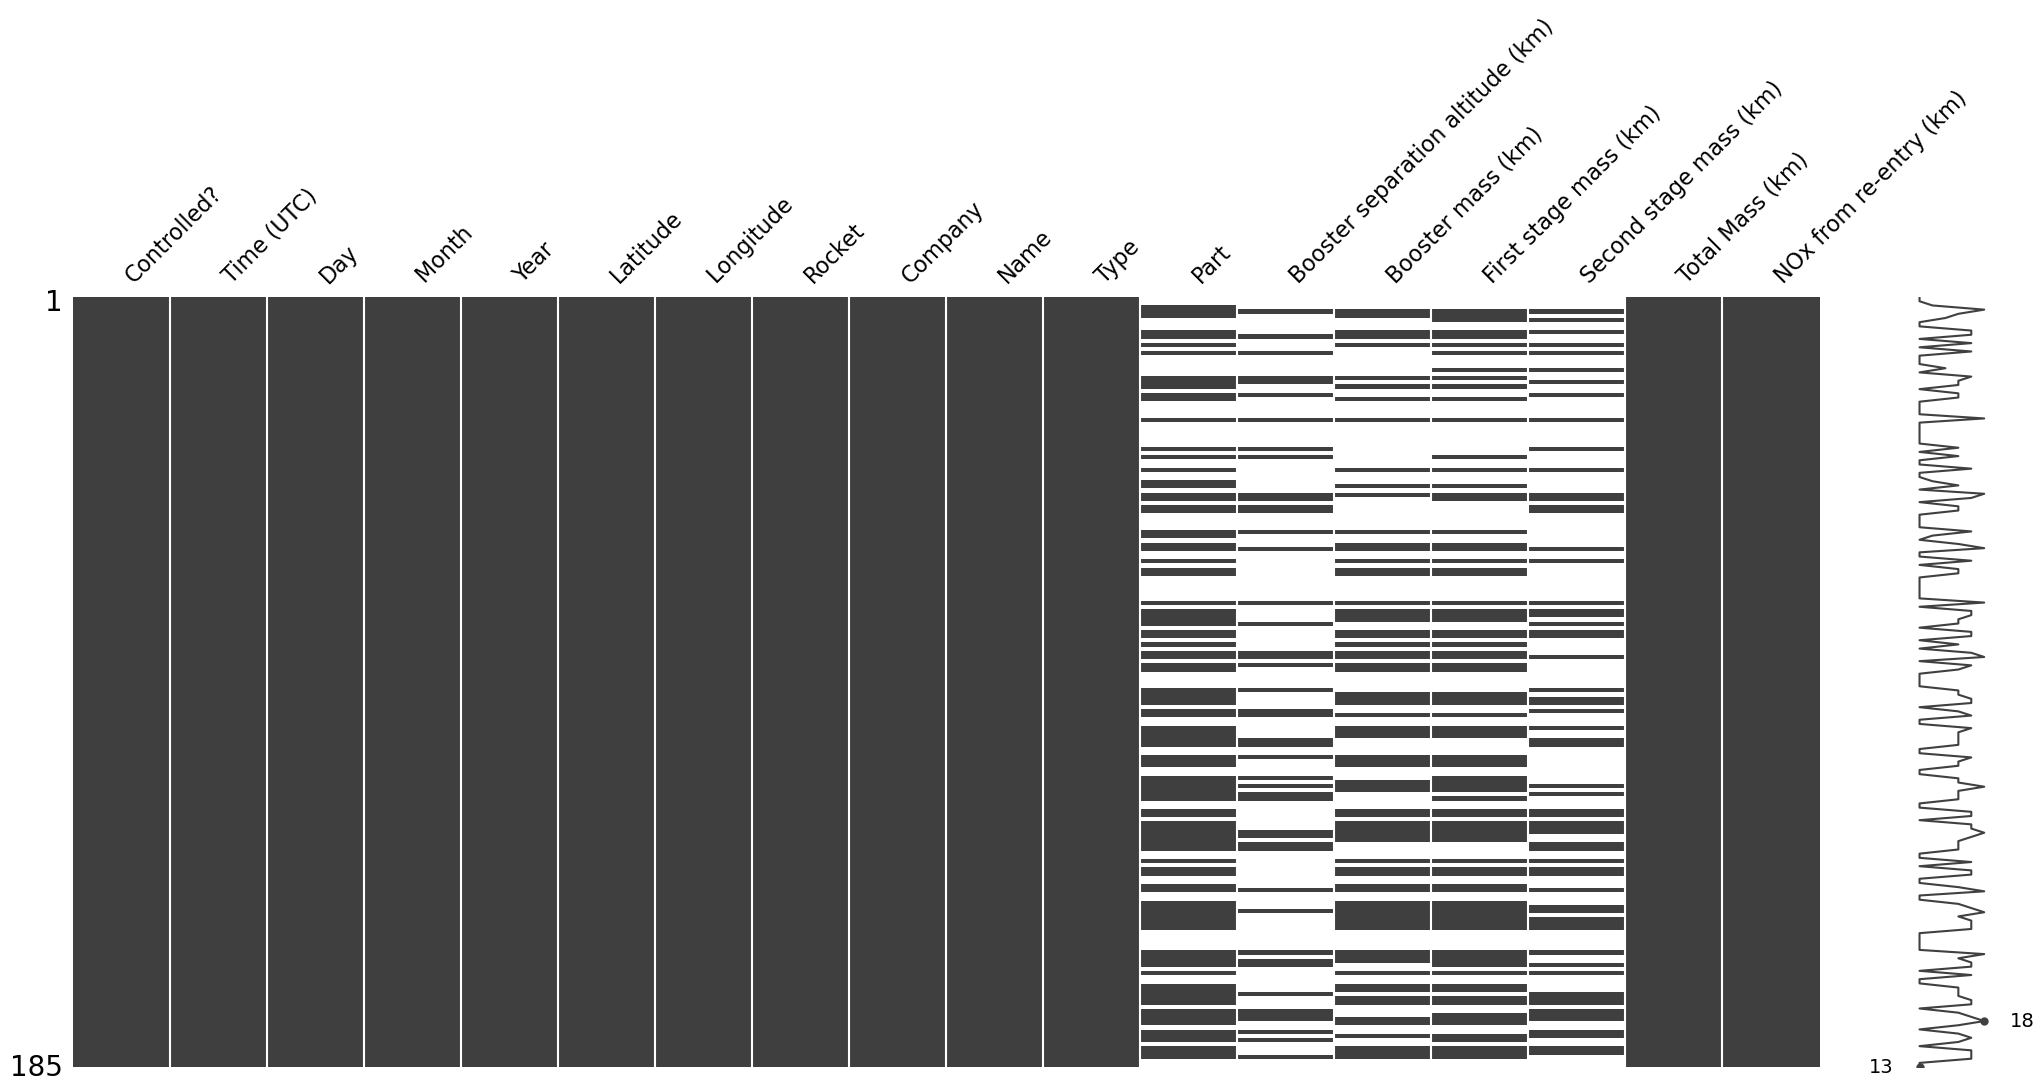

In [67]:
# Shows a matrix of NaN values for all the visual peoples
msno.matrix(reentries_df)
#What columns do we want to keep? 

## Cleaning Space X API df (dflaunch)

In [68]:
# Wrote DataFrame to a CSV file to cross check data in the dataframe, 
dflaunch.to_csv('dflaunch.csv', index=False)

In [69]:
dflaunch.shape

(216, 17)

In [70]:
#Dropped rows where Rocket Name column was empty, modify origianl DF
dflaunch.dropna(subset=['RocketName'], inplace=True)

# keep gridfins, reused, legs?

dflaunch.isna()
#to delete landingpad, block, flights

# to fill or delete nan values 

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


## Subquestion A
### How do SpaceX Rocket launches compare? e.g. fuel emissions, fuel types.

1. We have already read the Excel files we are going to use and read the tables into pandas DataFrames. 

In [71]:
import matplotlib.pyplot as plt

In [72]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (each, kg)","Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corporation (CASC),4 x Hypergolic,...,41100.0,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,204000.0,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corporation (CASC),NaN,...,0.0,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0


In [73]:
reentries_df.head()

,Controlled?,Time (UTC),Day,Month,Year,Latitude,Longitude,Rocket,Company,Name,Type,Part,Booster separation altitude (km),Booster mass (km),First stage mass (km),Second stage mass (km),Total Mass (km),NOx from re-entry (km)
0,N,1.516667,1.0,1.0,2019.0,7.823,54.164,CZ-2D,China Aerospace Science and Technology Corporation (CASC),CZ-2D,Rocket body,NaN,NaN,NaN,NaN,NaN,5500.0,5500.0
1,N,7.966667,5.0,1.0,2019.0,-43.753,-179.976,Cosmos 2430,Russian Space Forces (RAF),Cosmos 2430,Payload,NaN,NaN,NaN,NaN,NaN,1900.0,1900.0
2,N,9.533333,5.0,1.0,2019.0,-1.205,89.746,Falcon 9,SpaceX,Faclon 9,Rocket body,Second stage,NaN,NaN,NaN,NaN,4500.0,4500.0
3,N,17.133333,10.0,1.0,2019.0,28.246,102.027,CZ-3B/G3,CASC,CZ-3B/G3,Rocket body,First stage & boosters,50.0,15600.0,9800.0,4000.0,29400.0,14700.0
4,Y,15.566667,11.0,1.0,2019.0,34.632,-120.611,Falcon-9 v1.2 (Block 5),SpaceX,Falcon-9 v1.2 (Block 5),Rocket body,First stage,NaN,0.0,27200.0,NaN,27200.0,4760.0


### Emission factors for each fuel type:

These emission factors provide a standardised measure to estimate the amount of carbon dioxide emissions associated with different types of rocket fuels. They will help us to assess the environmental impact of rocket launches and help us to understand the how emissions are impacting the carbon footprint of space exploration. 



- **kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene**
    *The kerosene emission factor refers to the amount of carbon dioxide (CO2) produced when burning one kilogram of kerosene as a fuel for the rocket. It quantifies the greenhouse gas emissions associated with the combustion of kerosene during the rocket launch.*
- **hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen**
    *The hydrogen emission factor represents the quantity of carbon dioxide (CO2) released when one kilogram of hydrogen is burned as fuel for the rocket. It indicates the level of greenhouse gas emissions resulting from the combustion process using hydrogen as a propellant.*
- **hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel**
    *The hypergolic emission factor signifies the amount of carbon dioxide (CO2) generated when one kilogram of hypergolic fuel is burned in the rocket's engines. It denotes the emissions associated with the combustion of hypergolic fuels, which are a type of propellant that ignites spontaneously when they come into contact with each other.*
- **solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel**
    *The solid fuel emission factor represents the quantity of carbon dioxide (CO2) produced when one kilogram of solid fuel is burned as propellant in the rocket. It indicates the level of greenhouse gas emissions resulting from the combustion of solid fuels, which are typically used in rocket motors for their high energy content.*


In [74]:
#Defining the emission factors for each fuel type
kerosene_emission_factor = 3.1  # kg CO2 per kg of kerosene
hydrogen_emission_factor = 0.9  # kg CO2 per kg of hydrogen
hypergolic_emission_factor = 2.5  # kg CO2 per kg of hypergolic fuel
solid_fuel_emission_factor = 2.8  # kg CO2 per kg of solid fuel


In [75]:
#Calculating the total fuel emissions for each launch
all_launch_df['Total Fuel Emissions'] = (
    all_launch_df['Kerosene mass (kg)'] * kerosene_emission_factor +
    all_launch_df['Hydrogen mass (kg)'] * hydrogen_emission_factor +
    all_launch_df['Hypergolic mass (kg)'] * hypergolic_emission_factor +
    all_launch_df['Solid fuel mass (kg)'] * solid_fuel_emission_factor
)


In [76]:
# Group the launches by Rocket Type and calculate the total fuel emissions for each type
fuel_type_emissions = all_launch_df.groupby('Rocket Type')['Total Fuel Emissions'].sum()
fuel_type_emissions

Rocket Type
Antares-230                       817960.0
Antares-230+                      817960.0
Ariane-5ECA                      4544730.0
Ariane-5ECA+                     1515234.0
Atlas-5(551)                     1496219.0
Atlas-5(N22)                     1138127.0
CZ-11                             275912.0
CZ-11H                            137956.0
CZ-2C (3)                         445000.0
CZ-2D (2)                         546875.0
CZ-3B/G2                          974380.0
CZ-3B/G3                         6820660.0
CZ-3B/G3Z                        2923140.0
CZ-3C/G2                          768880.0
CZ-4B                            2327500.0
CZ-4C                            1745625.0
CZ-5                             2047610.0
CZ-6                              291958.0
Delta-4H (upg.)                   575280.0
Delta-4M+(4,2) (upg.)             368289.0
Delta-4M+(5,4) (upg.)             540720.0
Electron KS                       210180.0
Epsilon (2) CLPS                  234162.5

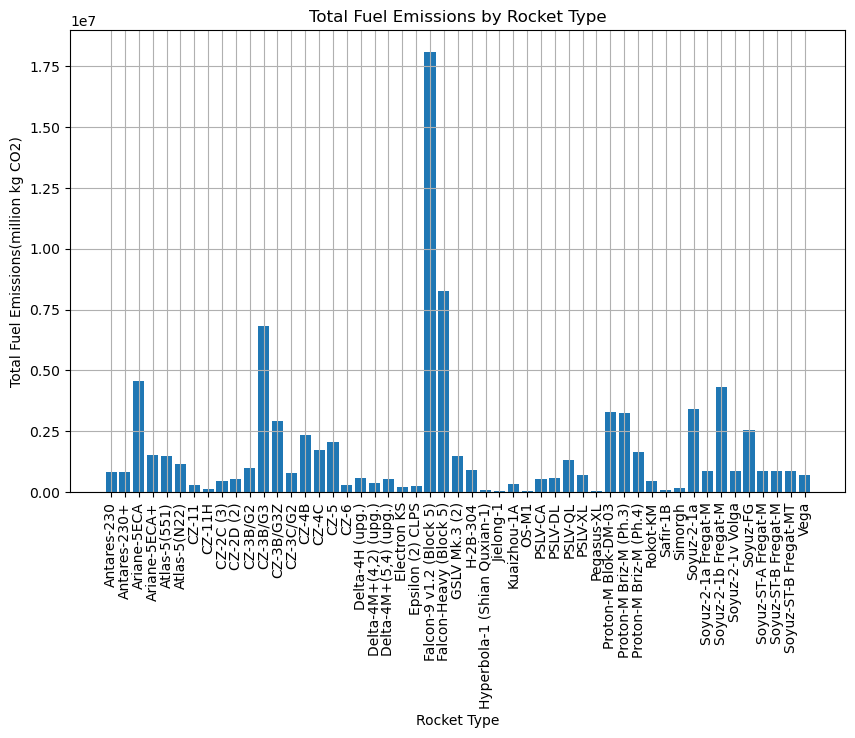

In [77]:
# Plot a bar graph to compare the total fuel emissions by Rocket Type

plt.figure(figsize=(10, 6))  
plt.bar(fuel_type_emissions.index, fuel_type_emissions.values)
plt.xlabel("Rocket Type")
plt.ylabel("Total Fuel Emissions(million kg CO2)")
plt.title("Total Fuel Emissions by Rocket Type")
plt.xticks(rotation=90)
plt.grid()
plt.show()

The **Falcon 9 v1.2 and the Falcon Heavy rockets** are designed, developed and manufactured by SpaceX, a private aerospace company founded by Elon Musk. On the bar plot above, from the rocket launches in 2019 within the data we collected, the Falcon 9 v1.2 and the Falcon Heavy were the 2 Rockets with the highest emissions. 

To analyse further why SpaceX Rockets have the highest emissions, we need to look at where the emissions are coming from. To do this we have chosen to compare the emissions from rockets from 4 different companies; Falcon 9 from Space X, Epsilon (2) CLPS from NASA, CZ-3B/G3 from China Aerospace Science and Technology Corporation (CASC) and Soyuz-2-1a from Russian Space Forces (RAF).  

In [78]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg),Total Fuel Emissions
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corporation (CASC),4 x Hypergolic,...,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0,974380.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0,1643620.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0,234162.5
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0,575280.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corporation (CASC),NaN,...,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0,137956.0


In [79]:
fuel_types = all_launch_df[['Rocket Type', 'Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']]

In [80]:
rocket_types = ['Falcon-9 v1.2 (Block 5)', 'Epsilon (2) CLPS', 'CZ-3B/G3', 'Soyuz-2-1a']

In [81]:
fuel_types_df = all_launch_df[all_launch_df['Rocket Type'].isin(rocket_types)][['Rocket Type', 'Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']]
fuel_types_df

,Rocket Type,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
0,CZ-3B/G3,0.0,18200.0,383200.0,0.0
1,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
2,Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
8,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
10,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0
11,CZ-3B/G3,0.0,18200.0,383200.0,0.0
16,CZ-3B/G3,0.0,18200.0,383200.0,0.0
18,Soyuz-2-1a,274180.0,0.0,0.0,0.0
22,CZ-3B/G3,0.0,18200.0,383200.0,0.0
24,Falcon-9 v1.2 (Block 5),530200.0,0.0,0.0,0.0


To get the sum of each type of Fuel mass, for each rocket type:
1. use the .groupby() function
2. then in the same line you need to apply the .sum() function

In [82]:
fuel_mass_sum = fuel_types_df.groupby('Rocket Type')[['Kerosene mass (kg)', 'Hydrogen mass (kg)', 'Hypergolic mass (kg)', 'Solid fuel mass (kg)']].sum()
fuel_mass_sum

,Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg)
Rocket Type,,,,
CZ-3B/G3,0.0,127400.0,2682400.0,0.0
Epsilon (2) CLPS,0.0,0.0,145.0,83500.0
Falcon-9 v1.2 (Block 5),5832200.0,0.0,0.0,0.0
Soyuz-2-1a,1096720.0,0.0,0.0,0.0


This graph works, but the values are overlapped so I did some research and found we need to 'offset' the bars. 

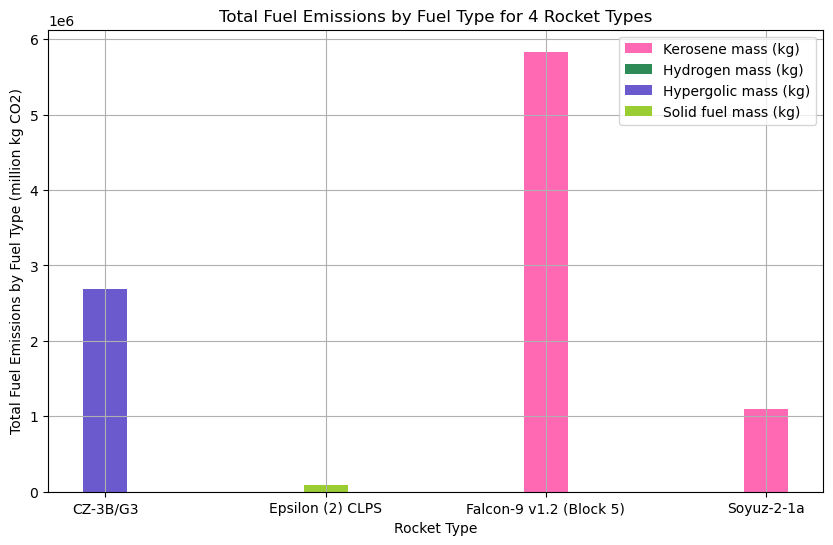

In [83]:
plt.figure(figsize=(10,6))
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Kerosene mass (kg)'], label='Kerosene mass (kg)', color='hotpink', width=0.2)
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Hydrogen mass (kg)'], label='Hydrogen mass (kg)', color='seagreen', width=0.2)
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Hypergolic mass (kg)'], label='Hypergolic mass (kg)', color='slateblue', width=0.2)
plt.bar(fuel_mass_sum.index, fuel_mass_sum['Solid fuel mass (kg)'], label='Solid fuel mass (kg)', color='yellowgreen', width=0.2)

plt.legend()
plt.xlabel('Rocket Type')
plt.ylabel('Total Fuel Emissions by Fuel Type (million kg CO2)')
plt.title('Total Fuel Emissions by Fuel Type for 4 Rocket Types')
plt.grid()

1. Set the bar_width and bar_offset variables. This needs to be bar_widthx2 to provide a reasonable space between the groups of bars, but this 'x2' can be played with to see the space between the bars and the overlap.
2. We need to convert the index values to a numeric type so we can perform a subtraction on them without getting an error (as I found out!)
3. Plot the barchart - at the start we need to subtract barr_offset from x_positions. This shifts the x-position of the bars to the left which creates the offset. This means the bars for each fuel-types will be positioned to the left, meaning they will be side by side. 
*In practice, this means if there are null values, our chart will show large blank spaces*

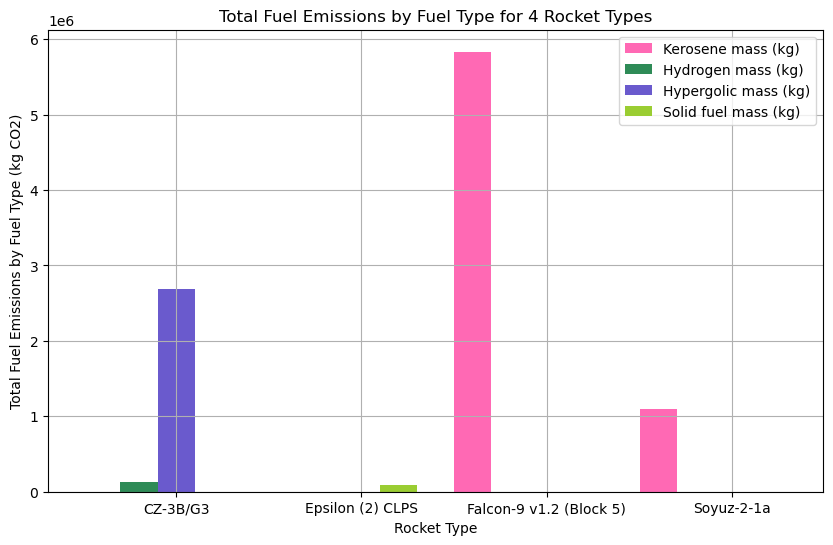

In [84]:
plt.figure(figsize=(10, 6))

bar_width = 0.2
bar_offset = bar_width * 2

x_positions = pd.RangeIndex(len(fuel_mass_sum))  # Numeric positions for the x-axis

plt.bar(x_positions - bar_offset, fuel_mass_sum['Kerosene mass (kg)'], label='Kerosene mass (kg)', color='hotpink', width=bar_width)
plt.bar(x_positions - bar_offset/2, fuel_mass_sum['Hydrogen mass (kg)'], label='Hydrogen mass (kg)', color='seagreen', width=bar_width)
plt.bar(x_positions, fuel_mass_sum['Hypergolic mass (kg)'], label='Hypergolic mass (kg)', color='slateblue', width=bar_width)
plt.bar(x_positions + bar_offset/2, fuel_mass_sum['Solid fuel mass (kg)'], label='Solid fuel mass (kg)', color='yellowgreen', width=bar_width)

plt.legend()
plt.xlabel('Rocket Type')
plt.ylabel('Total Fuel Emissions by Fuel Type (kg CO2)')
plt.title('Total Fuel Emissions by Fuel Type for 4 Rocket Types')
plt.grid()

plt.xticks(x_positions, fuel_mass_sum.index)  # Set the x-axis ticks and labels

plt.show()

From the breakdown of Fuel Type and Rocket Type, you can see that the Fuel Type that produces the most amount of emissions by far is Kerosene. Kerosene is a type of rocket fuel; it is used in liquid fueled rocket engines. It is a refined form of kerosene fuel that has been purified and processed to meet the requirements for rocket propulsion(i.e. the process of expelling fuel to propel a rocket into space). It is the only type of Rocket Fuel used in Rocket launches by SpaceX in 2019. China Aerospace Science and Technology Corporation (CASC) has used Hypergolic Fuel and Hydrogen Fuel instead of Kerosene Fuel. 

Hypergolic fuel is a type of rocket propellant that ignites spontaneously upon contact with another component, known as the oxidizer, without the need for an ignition source like a spark or flame. In hypergolic fuel systems, the fuel and oxidizer are stored separately and are combined in the combustion chamber of the rocket engine, where they immediately react and ignite. The hypergolic reaction produces high-temperature gases, which are expelled through a nozzle to create thrust and propel the rocket.One advantage of hypergolic fuels is their simplicity and reliability. Since they ignite spontaneously, there is no need for complex ignition systems, which can be prone to failure. Hypergolic propellants have been widely used in various space missions, including satellite launches, spacecraft maneuvers, and even human spaceflight missions. However, they are highly toxic and require careful handling and storage procedures to ensure safety.

Hydroden fuel is a type of gas (H2) that is used as a propellant for rocket engines. It is often used in combination with liquid oxygen (LOX) as an oxidizer in a rocket engine's combustion process. The hydrogen fuel and liquid oxygen are stored separately in tanks onboard the rocket and are combined in the combustion chamber, where they undergo a controlled chemical reaction called combustion. This reaction releases a large amount of energy, generating high-pressure and high-velocity exhaust gases that are expelled through a nozzle, creating thrust and propelling the rocket forward. There are several advantages to using Hydrogen (It's cleaner and produces water vapour as its main byproduct, it has a higher thrust efficiency meaning it allows rockets to achieve higher speeds and carry heavier payloads, and finally it is can be obtained from a lot of sources in a clean way!)

However, there are some disadvantages, such as it requires careful handling and storage due to its low density and high flammability. Additionally, the cryogenic temperature requirements for storing hydrogen at extremely low temperatures (-253°C or -423°F) can pose engineering and operational challenges.

Solid fuel mass refers to a type of propellant that is in a solid state. It typically consists of a mixture of fuel and oxidizer components, compressed together into a solid form. Solid fuel rockets have a simpler design compared to liquid-fueled rockets because the propellant is already in a stable and compact form, eliminating the need for separate storage tanks and complex fuel delivery systems. When the solid fuel rocket is ignited, the combustion of the solid propellant releases a large amount of energy, creating hot gases that are expelled through a nozzle, generating thrust. The simplicity and reliability of solid fuel rockets make them a popular choice for applications such as military missiles, small satellite launches, and booster stages of larger launch vehicles. Solid fuel mass is easy to store and handle, does not require any special pressurisation systems or cryogenic temperatures and has a high thrust-to-weight ratio. However, is can be hazardous due to its highly energetic nature and potential for uncontrolled ignition and precombustion. 

As a fuel type, Kerosene is often used for many reasons. It can provide a significant amount of energy per unit of volume, allowinf rockets to achieve high speeds and payloads. It is relatively inexpensive and widely available, making it cost-effective compared to other more environmentally friendly fuel types. It is compatible with a range of rockets engine designs and can be used in combination with various oxidizers, such as liquid oxygen (LOX), to create combustible mixture. While kerosene is a hydrocarbon fuel and emits carbon dioxide (CO2) when burned, its environmental impact is lower compared to other fossil fuels such as coal or gas, although we do have to consider where we are getting this fuel from? It is a liquid fuel at room temperatire and can be stored and handles safely and easily compared to other fuel types, and also does not require extreme low-temperature storage. Essentially - it is a good "all-rounder" fuel type, despite it's CO2 emissions. 

As SpaceX moves forward, one pathway they could look into is using a more environmentally friendly fuel type with less CO2 emissions, such as Hydroden fuel. Hydrogen Fuel offers the potential for significantly reduced environmental impact compared to traditional rocket fuels due to the main b product being water vapour, making it a clean and intruiging option. This is particularly important as the aerospace industry seeks to reduce its carbon footprint and mitigate the effects of greenhouse gas emissions. Efficiency and Performance: Hydrogen fuel has a higher specific impulse (thrust efficiency) compared to many other rocket fuels. It provides a higher exhaust velocity, allowing rockets to achieve greater speeds and carry heavier payloads. This increased efficiency can lead to more cost-effective launches and enable the exploration of deeper space missions. Abundance and Availability: Hydrogen is the most abundant element in the universe and can be obtained from various sources, including water and renewable energy sources. Its availability makes it a potentially sustainable and long-term fuel option for space exploration. Additionally, advancements in hydrogen production technologies, such as electrolysis powered by renewable energy, can further enhance the sustainability of hydrogen fuel.Versatility and Compatibility: Hydrogen fuel is compatible with a wide range of rocket engine designs and can be used in combination with different oxidizers, such as liquid oxygen (LOX), to create a combustible mixture. This versatility allows for flexibility in designing rocket systems and optimizing performance based on mission requirements. echnological Advancements: Researching and developing hydrogen fuel technologies for rocket launches can drive innovation and technological advancements in propulsion systems. This can lead to improvements in engine efficiency, storage and handling techniques, and overall launch capabilities. Additionally, the knowledge gained from hydrogen fuel research can have potential applications in other sectors, such as transportation and energy production. While there are challenges to overcome in terms of hydrogen storage, handling, and infrastructure, ongoing research and investment in hydrogen fuel technology can address these hurdles and pave the way for a greener and more efficient future for rocket launches. By harnessing the benefits of hydrogen fuel, the aerospace industry can contribute to a more sustainable and environmentally conscious approach to space exploration.


## Subquestion B 
### What is Space X's decay impact after rocket launch?

In [85]:
df_space_decay.sample(n=20)

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
11111,2,STARLINK-1336,2020-025AC,EARTH,TEME,UTC,SGP4,2021-10-31T21:55:05.281248,15.064030,0.000124,...,548.065,546.344,PAYLOAD,LARGE,US,2020.0,AFETR,0 STARLINK-1336,1 45557U 20025AC 21304.91325557 .00002124 00000-0 16143-3 0 9999,2 45557 53.0568 23.4129 0001243 87.3491 272.7641 15.06402956 85154
2659,2,FENGYUN 1C DEB,1999-025CEN,EARTH,TEME,UTC,SGP4,2021-10-31T20:20:59.012736,14.181844,0.013010,...,925.299,737.704,DEBRIS,SMALL,PRC,1999.0,TSC,0 FENGYUN 1C DEB,1 31739U 99025CEN 21304.84790524 .00000082 00000-0 56816-4 0 9997,2 31739 98.9610 341.4064 0130100 60.8447 300.5675 14.18184409741787
2951,2,FENGYUN 1C DEB,1999-025CTN,EARTH,TEME,UTC,SGP4,2021-10-31T11:01:10.705152,13.712986,0.027817,...,1200.009,789.820,DEBRIS,SMALL,PRC,1999.0,TSC,0 FENGYUN 1C DEB,1 32168U 99025CTN 21304.45915168 .00001626 00000-0 14302-2 0 9991,2 32168 101.6618 13.6122 0278168 269.4681 87.4582 13.71298618427832
12430,2,FREGAT DEB,2011-037NP,EARTH,TEME,UTC,SGP4,2021-10-31T21:41:54.684960,11.233463,0.191546,...,3656.548,430.309,DEBRIS,SMALL,CIS,2011.0,TTMTR,0 FREGAT DEB,1 47332U 11037NP 21304.90410515 .00000145 00000-0 56393-4 0 9996,2 47332 51.4232 163.6481 1915463 306.6370 37.2834 11.23346344 33623
5246,2,FENGYUN 1C DEB,1999-025EEQ,EARTH,TEME,UTC,SGP4,2021-10-31T14:27:32.445504,14.403559,0.030072,...,971.901,542.749,DEBRIS,SMALL,PRC,1999.0,TSC,0 FENGYUN 1C DEB,1 37056U 99025EEQ 21304.60245886 .00001060 00000-0 20791-3 0 9994,2 37056 98.8705 225.6773 0300718 309.4726 48.0208 14.40355934437107
1688,2,FENGYUN 1C DEB,1999-025AFZ,EARTH,TEME,UTC,SGP4,2021-10-31T19:08:01.021056,14.046186,0.014318,...,981.742,773.953,DEBRIS,SMALL,PRC,1999.0,TSC,0 FENGYUN 1C DEB,1 30462U 99025AFZ 21304.79723404 .00000487 00000-0 30181-3 0 9991,2 30462 98.7801 318.6496 0143185 148.5345 23.3952 14.04618597756848
2452,2,FENGYUN 1C DEB,1999-025BUM,EARTH,TEME,UTC,SGP4,2021-10-31T20:23:46.911264,14.310024,0.015085,...,896.488,680.280,DEBRIS,SMALL,PRC,1999.0,TSC,0 FENGYUN 1C DEB,1 31449U 99025BUM 21304.84984851 .00000204 00000-0 84658-4 0 9994,2 31449 98.7632 344.7787 0150846 13.8965 346.6300 14.31002357761264
8946,2,THORAD AGENA D DEB,1970-025SZ,EARTH,TEME,UTC,SGP4,2021-10-31T22:40:08.947200,13.256668,0.018146,...,1299.999,1026.309,DEBRIS,SMALL,US,1970.0,AFWTR,0 THORAD AGENA D DEB,1 42543U 70025SZ 21304.94454800 .00000179 00000-0 46203-3 0 9991,2 42543 99.9110 17.6010 0181461 31.9330 329.2639 13.25666823384162
5266,2,COSMOS 2251 DEB,1993-036BFK,EARTH,TEME,UTC,SGP4,2021-10-30T14:26:52.075968,14.244316,0.019968,...,953.946,666.867,DEBRIS,SMALL,CIS,1993.0,PKMTR,0 COSMOS 2251 DEB,1 37089U 93036BFK 21303.60199162 .00002057 00000-0 73108-3 0 9997,2 37089 74.0485 22.5711 0199678 131.3489 230.5030 14.24431586445367
7659,2,MUOS 4,2015-044A,EARTH,TEME,UTC,SGP4,2021-10-31T21:07:36.575616,1.002719,0.005134,...,36003.038,35570.107,PAYLOAD,LARGE,US,2015.0,AFETR,0 MUOS 4,1 40887U 15044A 21304.88028444 -.00000090 00000-0 00000-0 0 9999,2 40887 2.5909 358.8987 0051338 354.4816 78.9775 1.00271872 22626


Using the cleaned data, began by looking at a random sample of the space decay data frame. This gave an insight into what the data frame contained and what could be used to help answer the question. The sample helped to show that in order to find Space X's decay impact first needed to establish which data belong to Space X rockets.

In [86]:
dflaunch.head()

,FlightNumber,Date,RocketName,PayloadMassKG,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2A,167.743129,9.047721
2,3,2008-08-03,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin1C,167.743129,9.047721
3,4,2008-09-28,Falcon 1,None,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin2C,167.743129,9.047721
4,5,2009-07-13,Falcon 1,165,LEO,Kwajalein Atoll,None None,1,False,False,False,None,None,0,Merlin3C,167.743129,9.047721


Using the cleaned Space X API data, began looking at the head of the data frame to establish what could be used to help search through the decay data frame, which variables matched up with each other. The API data frame gave the Rocket Name and the date it was launched which could be used.

In [87]:
dflaunch['RocketName'].unique()

array(['Falcon 1', 'Falcon 9', 'Falcon Heavy'], dtype=object)

Using the API data, the unique Rocket Names were found to match to the Decay Data Frame

In [88]:
spacex_debris = df_space_decay[(df_space_decay['OBJECT_NAME'].str.contains('FALCON'))]
spacex_debris

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
1933,2,FALCONSAT 3,2007-006E,EARTH,TEME,UTC,SGP4,2021-11-01T03:28:53.743872,15.426129,0.000100,...,439.084,437.722,PAYLOAD,MEDIUM,US,2007.0,AFETR,0 FALCONSAT 3,1 30776U 07006E 21305.14506648 .00016756 00000-0 37495-3 0 9997,2 30776 35.4342 300.7307 0000999 107.8943 252.1895 15.42612906814219
3257,2,DEMOSAT/FALCON 1,2008-048A,EARTH,TEME,UTC,SGP4,2021-11-01T02:44:38.825664,14.850741,0.001306,...,622.483,604.228,PAYLOAD,LARGE,US,2008.0,KWAJL,0 DEMOSAT/FALCON 1,1 33393U 08048A 21305.11433826 .00001391 00000-0 85287-4 0 9998,2 33393 9.3452 139.6044 0013055 193.6918 166.2927 14.85074080710608
4485,2,FALCON 1 R/B,2009-037B,EARTH,TEME,UTC,SGP4,2021-10-31T14:25:02.071488,14.782830,0.004636,...,667.266,602.237,ROCKET BODY,LARGE,US,2009.0,KWAJL,0 FALCON 1 R/B,1 35579U 09037B 21304.60071842 .00001368 00000-0 96333-4 0 9992,2 35579 9.0464 330.5891 0046364 201.9694 157.8505 14.78283008664836
5350,2,FALCON 9 R/B,2010-066K,EARTH,TEME,UTC,SGP4,2021-10-31T20:00:23.444352,6.996971,0.423221,...,10055.525,281.813,ROCKET BODY,LARGE,US,2010.0,AFETR,0 FALCON 9 R/B,1 37253U 10066K 21304.83360468 .00011662 00000-0 93543-3 0 9994,2 37253 34.5030 102.1095 4232215 100.7941 308.3402 6.99697064271484
6607,2,CUSAT 2/FALCON 9,2013-055G,EARTH,TEME,UTC,SGP4,2021-11-01T02:54:32.612256,14.553651,0.055953,...,1104.685,311.678,PAYLOAD,LARGE,US,2013.0,AFWTR,0 CUSAT 2/FALCON 9,1 39271U 13055G 21305.12121079 .00016538 00000-0 37584-3 0 9993,2 39271 80.9615 84.7344 0559534 94.3354 272.1955 14.55365144423493
7155,2,FALCON 9 R/B,2014-046B,EARTH,TEME,UTC,SGP4,2021-10-31T22:53:33.476352,4.081199,0.602027,...,20119.862,204.462,ROCKET BODY,LARGE,US,2014.0,AFETR,0 FALCON 9 R/B,1 40108U 14046B 21304.95385968 .00032227 00000-0 11959-2 0 9994,2 40108 24.1378 112.6963 6020267 49.5097 349.2570 4.08119937 85897
7360,2,FALCON 9 R/B,2015-010C,EARTH,TEME,UTC,SGP4,2021-10-31T17:05:09.156192,1.187472,0.820362,...,62193.403,388.697,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40426U 15010C 21304.71191153 -.00000098 00000-0 -99325-4 0 9992,2 40426 25.5773 335.7701 8203616 182.2859 166.5310 1.18747212 28559
7503,2,FALCON 9 R/B,2015-023B,EARTH,TEME,UTC,SGP4,2021-10-31T08:44:20.481216,3.173254,0.663182,...,26155.932,210.481,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40618U 15023B 21304.36412594 .00013025 00000-0 85261-3 0 9990,2 40618 25.4033 333.8058 6631818 317.9137 6.8835 3.17325376 65224
8061,2,FALCON 9 R/B,2016-013B,EARTH,TEME,UTC,SGP4,2021-10-31T16:00:59.306976,1.997514,0.749392,...,40212.177,296.142,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41381U 16013B 21304.66735309 .00002374 00000-0 24056-2 0 9992,2 41381 27.6613 64.0316 7493916 155.6234 276.6582 1.99751426 41059
8201,2,FALCON 9 R/B,2016-038C,EARTH,TEME,UTC,SGP4,2021-10-31T21:27:28.665792,1.183700,0.817624,...,62235.656,506.407,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41590U 16038C 21304.89408178 -.00000378 00000-0 -19860-3 0 9999,2 41590 23.8822 316.9366 8176240 53.7927 356.7017 1.18370018 23206


Using the Space Decay data frame and the unique values retrieved from the API to determine which values belonged to Space X. Each unique value from the API contained the string 'Falcon' so this was used to search through on the object name.

In [89]:
df_unique_name = spacex_debris['OBJECT_NAME'].unique()
df_unique_name

array(['FALCONSAT 3', 'DEMOSAT/FALCON 1', 'FALCON 1 R/B', 'FALCON 9 R/B',
       'CUSAT 2/FALCON 9', 'FALCONSAT-6', 'FALCON 9 DEB',
       'FALCON HEAVY R/B', 'FALCON EYE 2'], dtype=object)

From the list of unique values for 'Object name', check the unique list of names containing 'falcon', as this may contain objects belonging to other organizations

FALCONSAT 3, DEMOSAT/FALCON 1, FALCONSAT-6, beong to United States Air Force Academy (USAFA)

CUSAT 2/FALCON 9 belongs to Cornell University

FALCON EYE 2 belongs to United Arab Emirates (UAE) 

In [109]:
spacex_debris_data = df_space_decay[(df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))]
spacex_debris_data

,CCSDS_OMM_VERS,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,...,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,TLE_LINE0,TLE_LINE1,TLE_LINE2
4485,2,FALCON 1 R/B,2009-037B,EARTH,TEME,UTC,SGP4,2021-10-31T14:25:02.071488,14.782830,0.004636,...,667.266,602.237,ROCKET BODY,LARGE,US,2009.0,KWAJL,0 FALCON 1 R/B,1 35579U 09037B 21304.60071842 .00001368 00000-0 96333-4 0 9992,2 35579 9.0464 330.5891 0046364 201.9694 157.8505 14.78283008664836
5350,2,FALCON 9 R/B,2010-066K,EARTH,TEME,UTC,SGP4,2021-10-31T20:00:23.444352,6.996971,0.423221,...,10055.525,281.813,ROCKET BODY,LARGE,US,2010.0,AFETR,0 FALCON 9 R/B,1 37253U 10066K 21304.83360468 .00011662 00000-0 93543-3 0 9994,2 37253 34.5030 102.1095 4232215 100.7941 308.3402 6.99697064271484
7155,2,FALCON 9 R/B,2014-046B,EARTH,TEME,UTC,SGP4,2021-10-31T22:53:33.476352,4.081199,0.602027,...,20119.862,204.462,ROCKET BODY,LARGE,US,2014.0,AFETR,0 FALCON 9 R/B,1 40108U 14046B 21304.95385968 .00032227 00000-0 11959-2 0 9994,2 40108 24.1378 112.6963 6020267 49.5097 349.2570 4.08119937 85897
7360,2,FALCON 9 R/B,2015-010C,EARTH,TEME,UTC,SGP4,2021-10-31T17:05:09.156192,1.187472,0.820362,...,62193.403,388.697,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40426U 15010C 21304.71191153 -.00000098 00000-0 -99325-4 0 9992,2 40426 25.5773 335.7701 8203616 182.2859 166.5310 1.18747212 28559
7503,2,FALCON 9 R/B,2015-023B,EARTH,TEME,UTC,SGP4,2021-10-31T08:44:20.481216,3.173254,0.663182,...,26155.932,210.481,ROCKET BODY,LARGE,US,2015.0,AFETR,0 FALCON 9 R/B,1 40618U 15023B 21304.36412594 .00013025 00000-0 85261-3 0 9990,2 40618 25.4033 333.8058 6631818 317.9137 6.8835 3.17325376 65224
8061,2,FALCON 9 R/B,2016-013B,EARTH,TEME,UTC,SGP4,2021-10-31T16:00:59.306976,1.997514,0.749392,...,40212.177,296.142,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41381U 16013B 21304.66735309 .00002374 00000-0 24056-2 0 9992,2 41381 27.6613 64.0316 7493916 155.6234 276.6582 1.99751426 41059
8201,2,FALCON 9 R/B,2016-038C,EARTH,TEME,UTC,SGP4,2021-10-31T21:27:28.665792,1.183700,0.817624,...,62235.656,506.407,ROCKET BODY,LARGE,US,2016.0,AFETR,0 FALCON 9 R/B,1 41590U 16038C 21304.89408178 -.00000378 00000-0 -19860-3 0 9999,2 41590 23.8822 316.9366 8176240 53.7927 356.7017 1.18370018 23206
9264,2,FALCON 9 R/B,2017-063B,EARTH,TEME,UTC,SGP4,2021-11-01T09:10:46.776576,2.759551,0.694057,...,29994.174,190.630,ROCKET BODY,LARGE,US,2017.0,AFETR,0 FALCON 9 R/B,1 42968U 17063B 21305.38248584 .00075828 13607-5 36362-2 0 9993,2 42968 28.0463 329.8862 6940568 55.9306 351.7229 2.75955088 35262
9149,2,FALCON 9 R/B,2017-041B,EARTH,TEME,UTC,SGP4,2021-10-31T05:39:26.686656,1.909465,0.757925,...,41867.835,265.581,ROCKET BODY,LARGE,US,2017.0,AFETR,0 FALCON 9 R/B,1 42819U 17041B 21304.23572554 .00002618 00000-0 12934-2 0 9998,2 42819 26.4884 357.6568 7579248 251.3357 19.1049 1.90946474 29779
9078,2,FALCON 9 R/B,2017-025B,EARTH,TEME,UTC,SGP4,2021-10-31T19:37:01.027200,1.029372,0.837891,...,69772.441,338.650,ROCKET BODY,LARGE,US,2017.0,AFETR,0 FALCON 9 R/B,1 42699U 17025B 21304.81737300 .00000232 00000-0 20783-2 0 9993,2 42699 19.4123 161.4956 8378907 250.1762 11.3921 1.02937234 16790


## Line Graph depicting amount of Space Debris over time

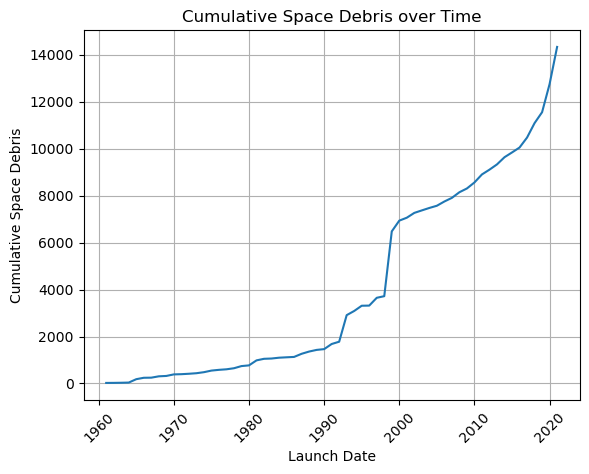

In [105]:
import matplotlib.pyplot as plt

df_space_decay = df_space_decay.sort_values('LAUNCH_DATE')
cumulative_space_objects = df_space_decay['LAUNCH_DATE'].value_counts().sort_index().cumsum()

plt.plot(cumulative_space_objects.index, cumulative_space_objects.values)

plt.xlabel('Launch Date')
plt.ylabel('Cumulative Space Debris')
plt.title('Cumulative Space Debris over Time')
plt.xticks(rotation=45)
plt.grid()

This line graph shows the amount of Space Debris created over time by all companies within the space decay data frame. It shows that until the early 1990's, a time period of 30years, there was a fairly stable and slow accumilation of space debris, from 0 to 2000 objects. Then after this period there is an exponential increase from 2000 objects to over 14,000 objects in a space of 30 years, an increase of 600%.

#### Next, in order to learn about Space X's decay impact, we must understand what the different peices of space debris is and what they mean.

## Understanding the the space decay

In [92]:
df_decay['OBJECT_TYPE'].unique()

array(['DEBRIS', 'PAYLOAD', 'ROCKET BODY', 'TBA'], dtype=object)

### Rocket Body:

A rocket body refers to the main component of a launch vehicle or a rocket that was intentionally placed into orbit to deliver a payload, such as a satellite or spacecraft, into space.
Rocket bodies are typically large and designed to withstand the stresses of launch and space environment.
They are often tracked and cataloged by space agencies and organizations responsible for space surveillance and tracking, such as the United States Space Surveillance Network (SSN).
Rocket bodies can include various stages of a launch vehicle, such as the first stage, second stage, and upper stage.

### Debris:

Debris, also known as space debris or space junk, refers to man-made objects in space that are no longer functional or serve any purpose.
Debris can include fragments from rocket launches, old satellites, spent rocket stages, discarded equipment, and other objects that remain in orbit.
These objects can range in size, from small fragments to larger components.
Debris can pose a risk to operational satellites and spacecraft due to their potential for collisions, which could generate more debris and further exacerbate the space debris problem.

### Difference:

The distinction between "rocket body" and "debris" is based on the original intent and function of the object. Rocket bodies are the intentional components of a launch vehicle, whereas debris consists of non-functional or discarded objects in space.

## Pie Chart showing the proportion of different types of space debris

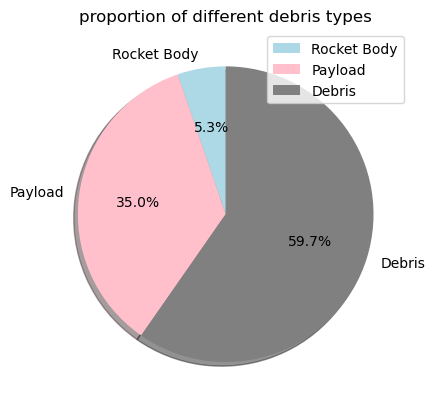

In [93]:
rocket_body_count = (df_decay['OBJECT_TYPE'] == 'ROCKET BODY').sum()
payload_count = (df_decay['OBJECT_TYPE'] == 'PAYLOAD').sum()
debris_count = (df_decay['OBJECT_TYPE'] == 'DEBRIS').sum()

slices= [rocket_body_count, payload_count, debris_count]

color_list = ['hotpink', 'green', 'grey']

labels_list = ['Rocket Body', 'Payload', 'Debris']
color_list = ['lightblue', 'pink', 'grey']

plt.pie(
    slices,
    labels=labels_list,
    colors=color_list,
    startangle=90,
    shadow= True,
    autopct='%1.1f%%'
)
plt.title('proportion of different debris types')
plt.legend()

This pie chart depicts the proptions of the different types of space debris. it shows that the majority, 59.3%, is unwanted debris with 35.4% consisting of known payloads such as satilites and only 5.3% as know and factored in rocket parts which will be entered.

In [94]:
dflaunch['Date'].min()

#shows when the first Space X rocket was launched

datetime.date(2006, 3, 24)

Using the Space X API to estabish when the first Space X rocket was launched.

## finding how much debris Space X has accumulated compared to others

In [95]:
all_launch_df.head()

,l,Day,Month,Year,Latitude,Longitude,Launch location,Rocket Type,Company,Booster fuel type,...,"Boosters mass (total, kg)",Stage 1 mass (kg),Stage 2 mass (kg),Stage 3 mass (kg),Stage 4 mass (kg),Kerosene mass (kg),Hydrogen mass (kg),Hypergolic mass (kg),Solid fuel mass (kg),Total Fuel Emissions
0,17.083333,10.0,1.0,2019.0,28.246,102.027,Xichang,CZ-3B/G3,China Aerospace Science and Technology Corporation (CASC),4 x Hypergolic,...,164400.0,186200.0,32600.0,18200.0,0.0,0.0,18200.0,383200.0,0.0,974380.0
1,15.516667,11.0,1.0,2019.0,34.632,-120.611,Vandenberg,Falcon-9 v1.2 (Block 5),SpaceX,NaN,...,0.0,418700.0,111500.0,0.0,0.0,530200.0,0.0,0.0,0.0,1643620.0
2,0.833333,18.0,1.0,2019.0,31.251,131.082,Kagoshima,Epsilon (2) CLPS,NASA,NaN,...,0.0,66000.0,15000.0,2500.0,145.0,0.0,0.0,145.0,83500.0,234162.5
3,19.083333,19.0,1.0,2019.0,34.582,-120.626,Vandenberg,Delta-4H (upg.),United Launch Alliance (ULA),2 x Hydrogen,...,408000.0,204000.0,27200.0,0.0,0.0,0.0,639200.0,0.0,0.0,575280.0
4,5.700000,21.0,1.0,2019.0,40.961,100.298,Jiuquan,CZ-11,China Aerospace Science and Technology Corporation (CASC),NaN,...,0.0,35000.0,10000.0,4050.0,220.0,0.0,0.0,0.0,49270.0,137956.0


In [96]:
all_launch_df['Company'].sample(3)

57    China Aerospace Science and Technology Corporation (CASC)
26    China Aerospace Science and Technology Corporation (CASC)
44    China Aerospace Science and Technology Corporation (CASC)
Name: Company, dtype: object

selecting a random sample of companies for comparison

In [97]:
nasa_rockets = all_launch_df.loc[(all_launch_df['Company'] == 'NASA'), 'Rocket Type']
nasa_debris = df_space_decay.loc[(df_space_decay.LAUNCH_DATE >= 2006.0) & (df_space_decay['OBJECT_NAME'].str.contains('EPSILON')), 'RCS_SIZE'].count()
nasa_debris

5

In [98]:
CASC_rockets = all_launch_df.loc[(all_launch_df['Company'].str.contains('CASC')), 'Rocket Type']
CASC_debris = df_space_decay.loc[(df_space_decay.LAUNCH_DATE >= 2006.0) & (df_space_decay['OBJECT_NAME'].str.contains('CZ')) | (df_space_decay['OBJECT_NAME'].str.contains('KUAIZHOU')), 'RCS_SIZE'].count()
CASC_debris
# CASC_rockets

531

In [99]:
ULA_rockets = all_launch_df.loc[(all_launch_df['Company'].str.contains('ULA')), 'Rocket Type']
ULA_debris = df_space_decay.loc[(df_space_decay.LAUNCH_DATE >= 2006.0) & (df_space_decay['OBJECT_NAME'].str.contains('DELTA')) | (df_space_decay['OBJECT_NAME'].str.contains('ATLAS')), 'RCS_SIZE'].count()
ULA_debris
# ULA_rockets

251

In [113]:
spacex_debris_count = df_space_decay.loc[(df_space_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_space_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_space_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B')), 'RCS_SIZE'].count()
spacex_debris_count

37

## Graph Depicting number of pieces of debris from SpaceX compared to other companies after Space X's establishment in 2006

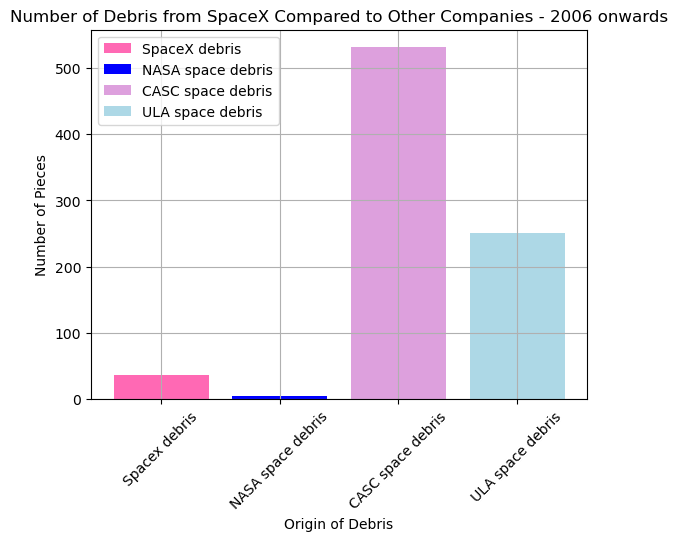

In [114]:
plt.bar([0],[spacex_debris_count],
label="SpaceX debris", color='hotpink',width=.2)

plt.bar([0.25],[nasa_debris],
label="NASA space debris", color='blue',width=.2)

plt.bar([0.5],[CASC_debris],
label="CASC space debris", color='plum',width=.2)

plt.bar([0.75],[ULA_debris],
label="ULA space debris", color='lightblue',width=.2)

LABLES = ['Spacex debris', 'NASA space debris', 'CASC space debris', 'ULA space debris']
spaces = [0, 0.25, 0.5, 0.75]

plt.legend()
plt.xlabel('Origin of Debris')
plt.ylabel('Number of Pieces')
plt.xticks(spaces, LABLES, rotation = 45)
plt.title('Number of Debris from SpaceX Compared to Other Companies - 2006 onwards')

plt.grid()

This graph shows Space X's impact on the amount of pieces of space debris compared to randomly selected companies, Nasa, CASC and ULA. The graph shows that in comparision to CASC and ULA, Space X has made a very minimal contribution since its establishment in 2006 but still more than its American counterpart NASA. Space X has accumpulated around 40 pieces of debris compared to CASC's 650 and ULA's 480. However, this is still around 500% more than NASA's 5.

## Bar graph depicting SpaceX debris based on size

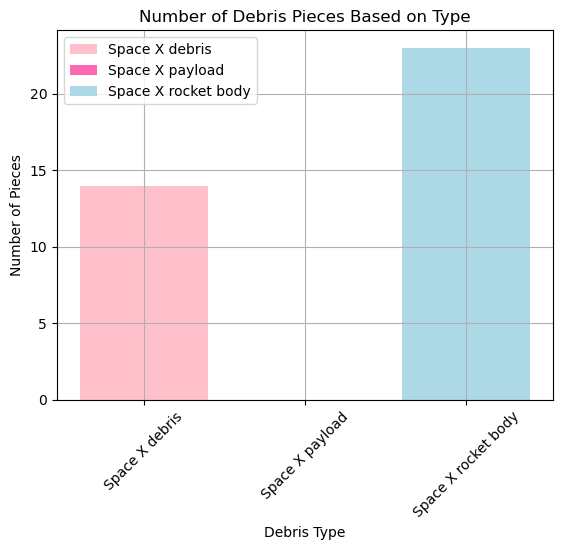

In [128]:
spacex_debris = df_decay.loc[((df_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))) 
                   & (df_decay['OBJECT_TYPE'] == 'DEBRIS'), 'RCS_SIZE'].count()
spacex_payload = df_decay.loc[((df_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))) 
                   & (df_decay['OBJECT_TYPE'] == 'PAYLOAD'), 'RCS_SIZE'].count()
spacex_rocketbody = df_decay.loc[((df_decay['OBJECT_NAME'].str.contains('FALCON 1 R/B'))
                                    |(df_decay['OBJECT_NAME'].str.contains('FALCON 9 R/B'))
                                      |(df_decay['OBJECT_NAME'].str.contains('FALCON 9 DEB'))
                                        |(df_decay['OBJECT_NAME'].str.contains('FALCON HEAVY R/B'))) 
                   & (df_decay['OBJECT_TYPE'] == 'ROCKET BODY'), 'RCS_SIZE'].count()

plt.bar([0],[spacex_debris],
label="Space X debris", color='pink',width=.2)

plt.bar([0.25],[spacex_payload],
label="Space X payload", color='hotpink',width=.2)

plt.bar([0.5],[spacex_rocketbody],
label="Space X rocket body", color='lightblue',width=.2)


LABLES = ['Space X debris', 'Space X payload', 'Space X rocket body']
spaces = [0, 0.25, 0.5]

plt.legend()
plt.xlabel('Debris Type')
plt.ylabel('Number of Pieces')
plt.xticks(spaces, LABLES, rotation = 45)
plt.title('Number of Debris Pieces Based on Type')

plt.grid()

This bar graph depicts the accumilation of Space X's debris based on its type. Although Space X has not accumulated much compared to ther companies, this graph shows that a considerable amount of it, around 14 pieces is unwanted decaying debris. This debris cannot be reused or taken away and must be left for it to reenter the asmospher or decay on its own. This is comapred to the rockey bodies, with a count of around 24. These are known pieces, intentionally put there and can be called back by Space X in a hope of being reused. Finally there are zero payload peices which are usually satilites.

As Space X continues to develop it is obvious from the data they are learn from each launch and other companies around them. This is shown through the fact that, although the have created debris, they have made very little is comparision to many of their counterparts. Elon Musk talks a lot in the media about how he is trying to create a company which works alongside the environment and reuse what they create to stop the abundent amount of waste. This is shown in the data as, especially compared to ULA and CASC, Space X has very little debris in the Earth's atmosphere.